### CMSC 197 Problem Set: 
Implementing Linear Regression wit 
Gradient Descent as Optimization Function

Submitted by: Kristina V. Celis

Github: <insert link>

In [596]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [597]:
# Load Dataset
data = pd.read_csv('Advertising.csv').drop(columns=['Unnamed: 0'])
data.head()

,TV,Radio,Newspaper,Sales
0,230.0999999999999943,37.7999999999999972,69.2000000000000028,22.1000000000000014
1,44.5000000000000000,39.2999999999999972,45.1000000000000014,10.4000000000000004
2,17.1999999999999993,45.8999999999999986,69.2999999999999972,9.3000000000000007
3,151.5000000000000000,41.2999999999999972,58.5000000000000000,18.5000000000000000
4,180.8000000000000114,10.8000000000000007,58.3999999999999986,12.9000000000000004


In [598]:
# Extract features (X) and the response variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [599]:
# Standardize dataset for convergence
X_scaled = preprocessing.scale(X)

Scaling X helps gradient descent work efficiently, but scaling y is usually unnecessary because the magnitude of the target variable doesn’t affect the optimization of the weights in the same way that the features do.

In [601]:
# Add a bias term (a column of 1s) to X
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [602]:
# Split dataset into train (75%) and test (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [603]:
# FUNCTIONS

# Initialize weights (including bias term)
def initialize_weights():
    return np.array([0.0, 0.0, 0.0, 0.0])

# Function for predicted sales
def predict(X, weights):
    # Multiply X by weights
    return np.dot(X, weights)

# Compute the cost (mean squared error)
def compute_cost(y, y_hat):
    m = len(y)  # No. of training examples 
    cost = (1 / (2 * m)) * np.sum(np.square(y_hat - y))  # MSE
    return cost

# Compute the gradient (partial derivatives of cost function w.r.t weights)
def compute_gradient(X, y, y_hat):
    m = len(y)
    w = (1 / m) * np.dot(X.T, (y_hat - y))  # Gradient calculation
    return w # Gradient matrix

# Update the weights using gradient descent
def update_weights(weights, gradient, learning_rate):
    return weights - learning_rate * gradient  # Update rule

# Implement gradient descent to optimize the weights
def grad_descent(X, y, learning_rate, iterations):
    weights = initialize_weights()  # Initialize weights
    cost_history = []  # Store cost values after each iteration
    
    for i in range(iterations):
        y_hat = predict(X, weights)
        gradients = compute_gradient(X, y, y_hat)  # Calculate gradients
        weights = update_weights(weights, gradients, learning_rate)  # Update weights
        cost = compute_cost(y, y_hat)  # Calculate cost
        cost_history.append(cost)  # Store cost
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
            
    return weights, cost_history

# Plot costs over iterations
def plot_costs(cost_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)
    plt.title('Cost Function over Iterations', fontsize=16)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Cost', fontsize=14)
    plt.grid(True)
    plt.show()

In [604]:
# Set parameters
learning_rate = 0.01
iterations = 500

Iteration 0, Cost: 115.70190000000001
Iteration 100, Cost: 15.396401063661765
Iteration 200, Cost: 3.164915618076188
Iteration 300, Cost: 1.6204688072390367
Iteration 400, Cost: 1.4174604685028682


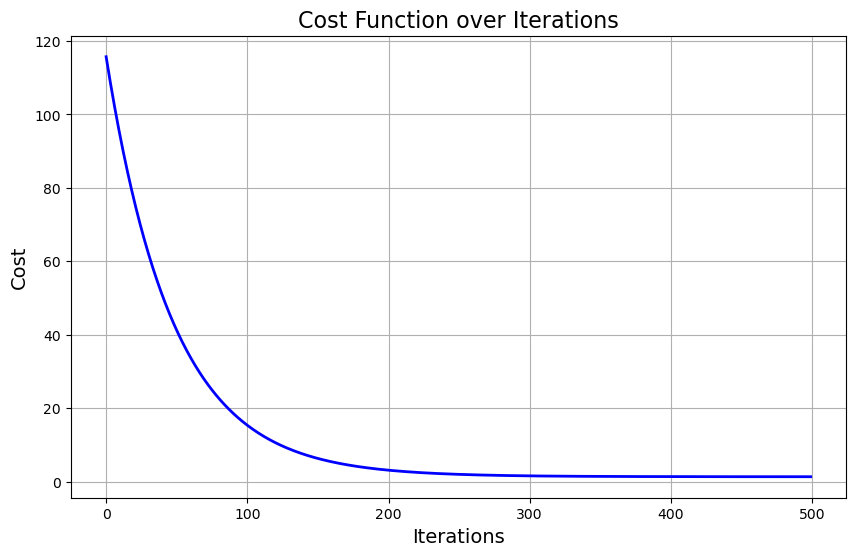

In [605]:
# Call gradient descent to optimize weights
weights, cost_history = grad_descent(X_train, y_train, learning_rate, iterations)

# Plot the cost function over iterations
plot_costs(cost_history)

In [606]:
# Predict on train and test data
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

In [607]:
# Calculate the cost for the train and test sets
train_cost = compute_cost(y_train, y_train_pred)
test_cost = compute_cost(y_test, y_test_pred)

print(f"Train Cost: {train_cost}")
print(f"Test Cost: {test_cost}")

Train Cost: 1.3892021269371782
Test Cost: 1.4623598168316339


This result indicates that the model is performing well, as the test MSE is only slightly higher than the training MSE.

# Analysis

### 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:

The cost function plot shows that the MSE flattens out around 400-500 iterations which indicates the algorithm has converged to  a minimum, so it suggests that the model has reached the optimal set of weights

In [612]:
print(f"Optimal weights: {weights}")

# Linear model equation using optimal weights
print(f"Linear Model: h(x) = {weights[0]:.4f} + {weights[1]:.4f} * TV + {weights[2]:.4f} * Radio + {weights[3]:.4f} * Newspaper")


Optimal weights: [13.90499354  3.899467    2.78888618  0.1087248 ]
Linear Model: h(x) = 13.9050 + 3.8995 * TV + 2.7889 * Radio + 0.1087 * Newspaper


### What are your interpretations regarding the formed linear model?

- Intercept (13.9050): This is the baseline sales when no money is spent on TV, Radio, or Newspaper advertising. So, even without advertising, we expect sales of about 13.9050 units. <br>
- TV Coefficient (3.8995): Holding Radio and Newspaper spending constant, for every additional unit spent on TV advertising, sales increase by 3.8995 units. This means TV advertising has a significant positive effect on sales. <br>
- Radio Coefficient (2.7889): Holding TV and Newspaper spending constant, for every additional unit spent on Radio advertising, sales increase by 2.7889 units. Radio also has a positive impact, but slightly less than TV. <br>
- Newspaper Coefficient (0.1087): Holding TV and Radio spending constant, for every additional unit spent on Newspaper advertising, sales increase by only 0.1087 units. This suggests that Newspaper advertising has a minimal effect on sales compared to TV and Radio.
  
<br>Overall, the model suggests that focusing more on TV and Radio advertising will yield higher sales compared to Newspaper advertising.

### 2. Provide a scatter plot of the predicted and actual y-values for both the train and test set. Is there a trend??

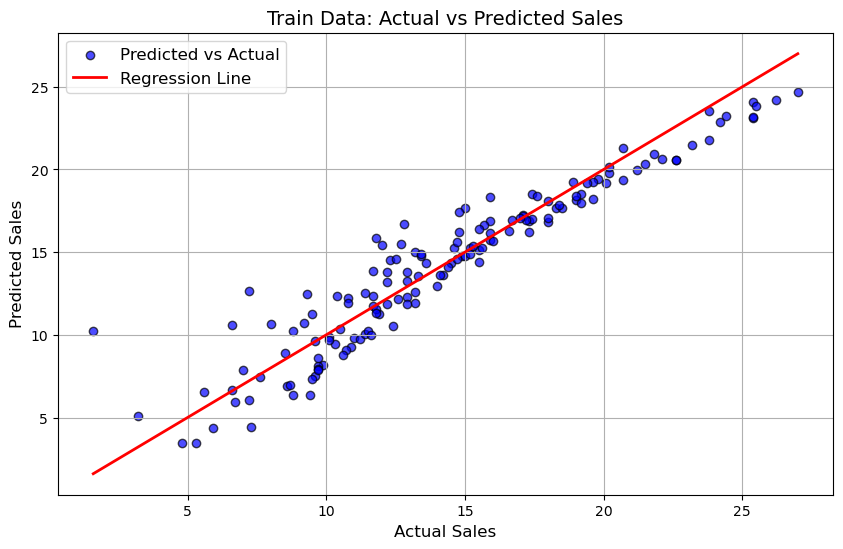

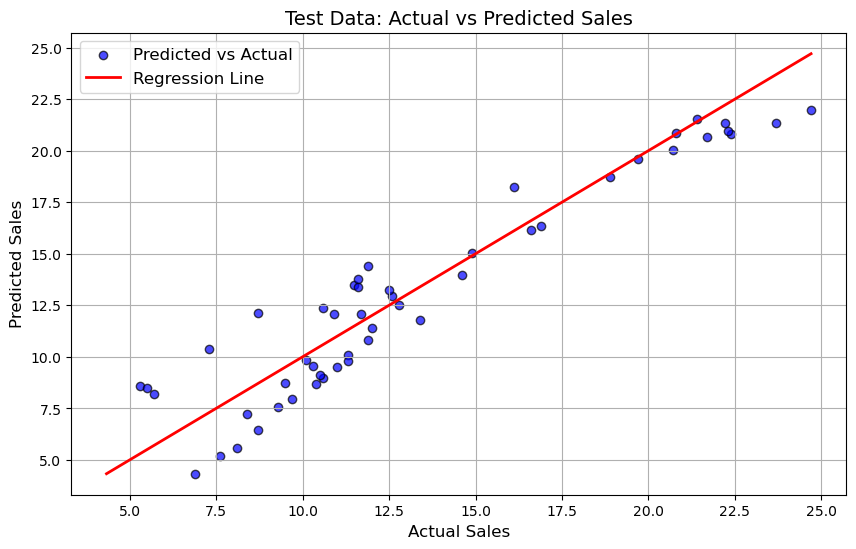

In [616]:
# Scatter Plot Predicted vs Actual (Train/Test)
def plot_actual_vs_predicted_with_regression_line(y_actual, y_pred, title):
    plt.figure(figsize=(10, 6))
    
    plt.scatter(y_actual, y_pred, color='blue', edgecolor='black', alpha=0.7, label='Predicted vs Actual')
    
    # Plot the regression line (y_actual = y_pred)
    min_val = min(y_actual.min(), y_pred.min())
    max_val = max(y_actual.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')
    
    # Title and labels
    plt.title(title, fontsize=14)
    plt.xlabel("Actual Sales", fontsize=12)
    plt.ylabel("Predicted Sales", fontsize=12)
    
    # Grid and legend
    plt.grid(True)
    plt.legend(loc='upper left', fontsize=12)
    
    plt.show()

# Plot for Train Data
plot_actual_vs_predicted_with_regression_line(y_train, y_train_pred, "Train Data: Actual vs Predicted Sales")

# Plot for Test Data
plot_actual_vs_predicted_with_regression_line(y_test, y_test_pred, "Test Data: Actual vs Predicted Sales")


There is a positive linear trend in both training and test data, indicating that the model is predicting sales accurately based on the advertising inputs.

### Provide an r2 score (also available in sklearn).

In [619]:
# Calculate R² scores for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² Score for Train Set: {r2_train}")
print(f"R² Score for Test Set: {r2_test}")

R² Score for Train Set: 0.8962519816802512
R² Score for Test Set: 0.8918637818286206


The R² score for the train set (0.896) and test set (0.891) both show that the model explains around 89% of the variance in the data, indicating a good fit and strong generalization.

### 3. What happens to the error, r2, and cost as the number of iterations increase? ).

- Cost (Error): The cost drops fast at first, meaning the model is learning quickly. After a while, it slows down and eventually levels off, showing the model is close to its best and more iterations won’t help much.

- R² Score: The R² score rises sharply early on, reflecting that the model is explaining more variance in the data. It stabilizes once the model reaches its optimal performance, meaning the model is no longer improving significantly with more iterations.

- Prediction Error: The difference between actual and predicted values decreases as the model learns. However, after a certain number of iterations, the error reduction slows down, and the model's predictions remain stable.


### Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

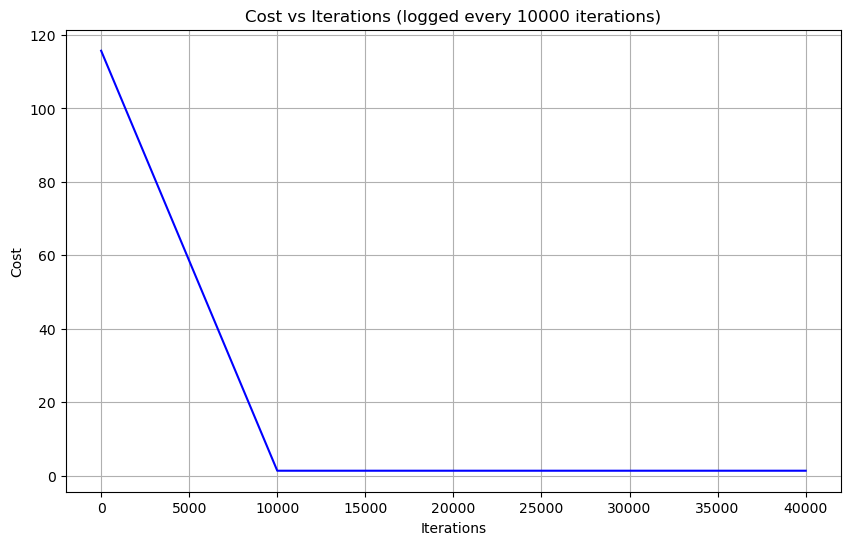

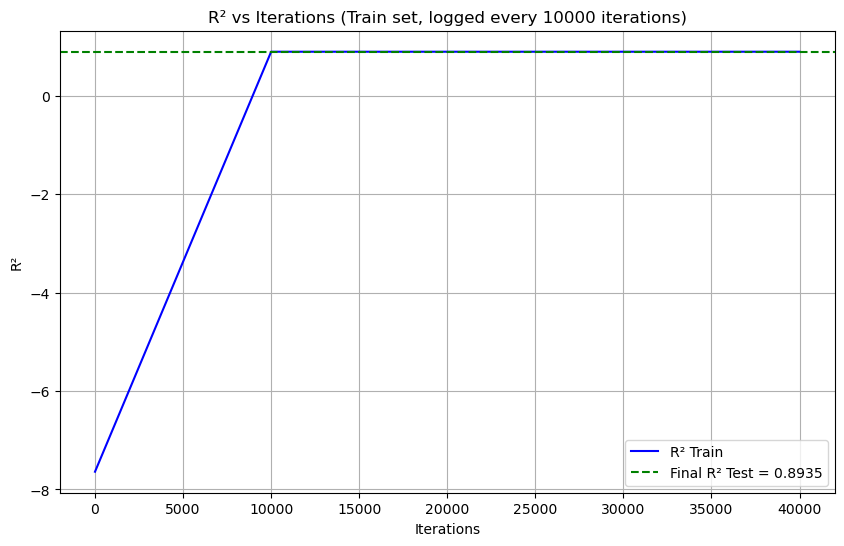

In [624]:
def grad_descent_log(X, y, learning_rate, max_iterations, log_every_n):
    weights = initialize_weights()
    cost_history_reduced = []
    r2_train_history = []
    r2_test_history = []
    iteration_points = []

    for i in range(max_iterations):
        # Predict y_hat for the current weights
        y_hat_train = predict(X, weights)
        
        # Compute gradients and update weights
        gradients = compute_gradient(X, y, y_hat_train)
        weights = update_weights(weights, gradients, learning_rate)
        
        # Log metrics every 10000 iterations
        if i % log_every_n == 0:
            # Calculate cost for the training set
            cost = compute_cost(y, y_hat_train)
            
            # Calculate R² score for train and test sets
            r2_train = r2_score(y, y_hat_train)
            
            # Store results
            cost_history_reduced.append(cost)
            r2_train_history.append(r2_train)
            iteration_points.append(i)
    
    return weights, cost_history_reduced, r2_train_history, iteration_points

def track_metrics_over_iterations(X_train, y_train, X_test, y_test, learning_rate, max_iterations, log_every_n=10000):
    weights, cost_history_reduced, r2_train_history, iteration_points = grad_descent_log(
        X_train, y_train, learning_rate, max_iterations, log_every_n)
    
    # Predict for test set based on final weights
    y_test_pred = predict(X_test, weights)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Plot Cost over Iterations
    plt.figure(figsize=(10, 6))
    plt.plot(iteration_points, cost_history_reduced, label='Cost (MSE)', color='blue')
    plt.title(f'Cost vs Iterations (logged every {log_every_n} iterations)')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

    # Plot R² over Iterations for the Train Set
    plt.figure(figsize=(10, 6))
    plt.plot(iteration_points, r2_train_history, label='R² Train', color='blue')
    plt.axhline(y=r2_test, color='green', linestyle='--', label=f'Final R² Test = {r2_test:.4f}')
    plt.title(f'R² vs Iterations (Train set, logged every {log_every_n} iterations)')
    plt.xlabel('Iterations')
    plt.ylabel('R²')
    plt.legend()
    plt.grid(True)
    plt.show()

track_metrics_over_iterations(X_train, y_train, X_test, y_test, learning_rate=0.01, max_iterations=50000, log_every_n=10000)


The cost converges around **10,000 iterations**, where it drops sharply and then flattens out, indicating the model has reached optimal performance. Further iterations show no improvement.

### Once you determine the optimal number of iterations, check the effect on the cost and 
error as you change the learning rate. The common learning rates in machine learnin 
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visuali e
the cost function (vs the optimal number of iterations) of each learning rate in ONLY  NE
PLOT. Provide your analysis.

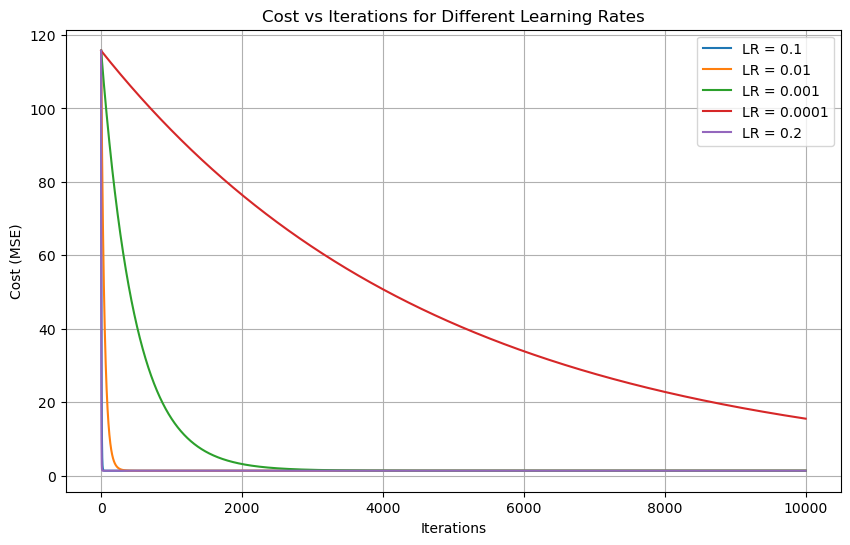

In [627]:
# Function to run gradient descent for a given learning rate
def grad_descent_for_lr(X, y, learning_rate, max_iterations):
    weights = initialize_weights()  # Initialize weights
    cost_history = []

    for i in range(max_iterations):
        y_hat_train = predict(X, weights)
        gradients = compute_gradient(X, y, y_hat_train)
        weights = update_weights(weights, gradients, learning_rate)
        cost = compute_cost(y, y_hat_train)
        cost_history.append(cost)
    
    return cost_history

# Test multiple learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
max_iterations = 10000 
cost_histories = {}

for lr in learning_rates:
    cost_histories[lr] = grad_descent_for_lr(X_train, y_train, lr, max_iterations)

# Plot all cost histories in one plot
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    plt.plot(cost_histories[lr], label=f'LR = {lr}')

plt.title('Cost vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.grid(True)
plt.show()


- LR = 0.2 and 0.1: These converge the fastest, dropping the cost quickly and reaching near-zero in fewer iterations. Indicates that they learn much faster and reach optimal performance with fewer iterations.
- LR = 0.01: A good balance, converges steadily without overshooting. Reliable for most situations.
- LR = 0.001: Slower but stable. Takes longer to reduce cost, so not ideal for fast results.
- LR = 0.0001: Extremely slow. Cost decreases very gradually, making it impractical for most tasks.

### 5. Is there a relationship on the learning rate and the number of iterations?

Yes, there is a clear relationship between the learning rate and the number of iterations required for the model to converge:

Higher learning rates (like 0.2 and 0.1) lead to faster convergence, meaning the cost reaches near-zero in fewer iterations. These rates allow the model to learn quicker, but if the learning rate is too high, it might cause instability or overshooting.

Lower learning rates (like 0.001 and 0.0001) require more iterations to reduce the cost. They ensure a more stable learning process but at the cost of speed. It takes significantly longer for the cost to converge to a minimum.

### 6. Compare the results with the results of ordinary least squares function.

In [632]:
# Create and fit the OLS model
ols_model_sklearn = LinearRegression()
ols_model_sklearn.fit(X_train, y_train)

# Get the weights (coefficients) and intercept from the OLS model
ols_weights = np.append(ols_model_sklearn.intercept_, ols_model_sklearn.coef_)

# Predict for train and test sets
y_train_pred_ols = ols_model_sklearn.predict(X_train)
y_test_pred_ols = ols_model_sklearn.predict(X_test)

# Calculate the R² score for train and test sets
r2_train_ols = ols_model_sklearn.score(X_train, y_train)
r2_test_ols = ols_model_sklearn.score(X_test, y_test)

# Calculate R² scores for the Gradient Descent model
r2_train_gd = r2_score(y_train, y_train_pred)
r2_test_gd = r2_score(y_test, y_test_pred)

# Calculate the costs for both models
train_cost_gd = compute_cost(y_train, y_train_pred)
test_cost_gd = compute_cost(y_test, y_test_pred)
ols_train_cost = mean_squared_error(y_train, y_train_pred_ols)
ols_test_cost = mean_squared_error(y_test, y_test_pred_ols)

# Print results in a table format
print("\nComparison of OLS and Gradient Descent:")
print("Metric                  OLS                Gradient Descent")
print("-" * 65)
print(f"R² (Train):           {r2_train_ols:<18.4f} {r2_train_gd:<20.4f}")
print(f"R² (Test):            {r2_test_ols:<18.4f} {r2_test_gd:<20.4f}")
print(f"Train Cost:           {ols_train_cost:<18.4f} {train_cost_gd:<20.4f}")
print(f"Test Cost:            {ols_test_cost:<18.4f} {test_cost_gd:<20.4f}")

# Print weights in one line
print("\nWeights:")
print("OLS Weights:", ', '.join(f'{w:.4f}' for w in ols_weights))
print("Gradient Descent Weights:", ', '.join(f'{w:.4f}' for w in weights))



Comparison of OLS and Gradient Descent:
Metric                  OLS                Gradient Descent
-----------------------------------------------------------------
R² (Train):           0.8966             0.8963              
R² (Test):            0.8935             0.8919              
Train Cost:           2.7679             1.3892              
Test Cost:            2.8800             1.4624              

Weights:
OLS Weights: 13.9915, 0.0000, 3.8909, 2.8354, 0.0558
Gradient Descent Weights: 13.9050, 3.8995, 2.7889, 0.1087


- In terms of weights, the OLS model has a slightly higher intercept and different coefficients, indicating it has a better fit for the training data compared to the GD model.
- The OLS model slightly outperforms the GD model in both training and test sets, with R² values indicating that OLS explains a bit more variance in the data. But both models have similar performance, with R² values close to 0.90, indicating a strong relationship between the independent variables and the dependent variable.
- The train and test costs for the GD model are significantly lower than those for the OLS model. This indicates that the GD model may be better at minimizing the error on both the training and test sets.
- The lower costs associated with the GD model suggest that it is achieving better predictions on the training and test datasets, even though the R² scores were slightly lower compared to OLS.
- This may indicate that while the OLS model fits the data well, the GD model might generalize better due to its lower cost, potentially making it less prone to overfitting.